# Feature Engineering

The whole end goal of feature engineering is simply to make your data better suited to the problem at hand.

For example: in the case of a Malaysian weather app, metrics such as heat indexes and "What it actually feels like?" are quantities that are derived from data such as air temperature, humidity, and wind speed, things which we can measure directly, so we can make these data points more relatble to human beings. This is called feature engineering. 

Feature Engineering is a part of Data preparation. Data preparation is at least 80% of your machine learning project. Do it right and will not only improve overall data quality, but the accuracy of your model as well.

In [5]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Reading file needed for housing dataset
df_housing = pd.read_csv('C:/Users/User/Forward School/ADS/W4/W4-01/data/housing_data.csv')

# Creating dummy dataset df_temp_color
data = { 'Temperature' : ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
        'Color': ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow']}
df_temp_color = pd.DataFrame( data, columns= ['Temperature', 'Color'] )


# Creating dummy dataset df_store
raw_data = {'userid' : ['001', '001', '001', '002', '002', '003', '004', '005', '005', '005'],
            'itemid': ['sk001', 'sk001', 'sk002', 'sk001', 'sk004', 'sk006', 'sk001', 'sk006', 'sk009', 'sk001'],
            'qty': [1,2,1,4,6,2,9,10,2,3],
           'amount': [30,60,20,120,60,2,270,10,3,90]}
df_store = pd.DataFrame( raw_data, columns= ['userid', 'itemid', 'qty','amount'])

# Standard Preprocessing

As a review some of the most important core concepts before we even start feature engineering

## Data Imputation
1. It's common to drop rows from your data if it does not exceed 5% of your data.
2. However, if dropping the rows of data means dropping a significant percentage of data, imputation is the way to ensure that you fill in NaNs meaningfully without needing to drop them.
3. Data Imputation is split into two main methods, Categorical Imputation and Numerical Imputation

### Imputing Numerical Data

The most common imputation method is through the `fillna` function.
- `df.fillna(0)` will fill all null values in the columns to 0
- `df['column_name'].fillna(0)` will fill all null values in the column to 0
- There are also options in the `method` parameter to enable functions like `back filling` and `forward filling`, which means to take the last non NaN value to be filled backwards or forwards
- Values such as a column's mean or median can also be used to populate NaNs in a specific column i.e `df.fillna(df['column'].median())`

In [6]:
# Check for missing values
print (df_housing.isnull().sum())

# Optional - remember the index of rows with missing values
null_list = df_housing[df_housing['total_bedrooms'].isnull()].index.tolist()
df_housing.loc[null_list]

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         9
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [ ]:
# ['Total bedrooms'] have missing numeric values

# Fill with 0
df_housing_zero = df_housing['total_bedrooms'].fillna(0)

# Fill wtih mean 
df_housing_mean = df_housing.fillna(df_housing.mean())

# Fill rows with values before
df_housing_forwardfill = df_housing.fillna(method='ffill')

# Try it out yourself! Code below allows you to check before/afters
df_housing_mean.loc[null_list]
df_housing_forwardfill.loc[null_list]

In [ ]:
# double check the value "total_bedrooms"
df_housing_forwardfill.iloc[289:292]

### Imputing Categorical Data

`fillna()` can also be used for categorical features
- You can have the option of filling NaNs with the most commonly occuring data in the column using `idxmax`
- In other scenarios, in the example of data points like `gender`, you may also opt to fill columns with new categories like 'Other' to avoid filling in the wrong values

In [7]:
# Check for missing values
print (df_housing.isnull().sum())

# Optional - remember the index of rows with missing values
null_list = df_housing[df_housing['ocean_proximity'].isnull()].index.tolist()
df_housing.loc[null_list]

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         9
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
143,-122.21,37.80,50,2833,605.0,1260,552,2.8929,216700,NaN
887,-121.99,37.55,16,6647,2098.0,4649,1903,2.9074,213800,NaN
896,-121.96,37.53,23,2215,475.0,1278,492,4.2955,218800,NaN
905,-121.99,37.54,18,3584,715.0,1673,661,3.9444,240100,NaN
1022,-119.78,38.69,17,1364,282.0,338,152,2.4500,117600,NaN
1039,-120.97,38.42,16,1748,322.0,4930,287,4.3029,121900,NaN
1474,-122.04,37.97,26,2470,626.0,1174,573,2.9861,160900,NaN
1686,-122.26,37.98,28,2038,329.0,947,349,5.1178,198000,NaN
2010,-119.82,36.72,17,1276,242.0,927,238,2.6176,54100,NaN


In [8]:
# see what's the most frequent value in this column
df_housing.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9133
INLAND        6548
ISLAND           5
NEAR BAY      2287
NEAR OCEAN    2658
dtype: int64

In [9]:
# ['Ocean Proximity'] have missing categorical values

# Fill with maximum occuring value
df_housing['ocean_proximity'].fillna(df_housing['ocean_proximity'].value_counts().idxmax(), inplace=True)

# Fill with 'Others'
# df_housing['ocean_proximity'].fillna('Other', inplace=True)

In [10]:
df_housing.loc[null_list]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
143,-122.21,37.80,50,2833,605.0,1260,552,2.8929,216700,<1H OCEAN
887,-121.99,37.55,16,6647,2098.0,4649,1903,2.9074,213800,<1H OCEAN
896,-121.96,37.53,23,2215,475.0,1278,492,4.2955,218800,<1H OCEAN
905,-121.99,37.54,18,3584,715.0,1673,661,3.9444,240100,<1H OCEAN
1022,-119.78,38.69,17,1364,282.0,338,152,2.4500,117600,<1H OCEAN
1039,-120.97,38.42,16,1748,322.0,4930,287,4.3029,121900,<1H OCEAN
1474,-122.04,37.97,26,2470,626.0,1174,573,2.9861,160900,<1H OCEAN
1686,-122.26,37.98,28,2038,329.0,947,349,5.1178,198000,<1H OCEAN
2010,-119.82,36.72,17,1276,242.0,927,238,2.6176,54100,<1H OCEAN


## Handling Outliers

An outlier is a data point or observation whose value is quite different from the others in the dataset being analyzed. Outliers can be especially dangerous to distance based algorithms like KNN or K-means There are many rules of thumb that is used to identify/handle outliers. Some uses the Interquartile Range(IQR), standard deviation, or percentiles.

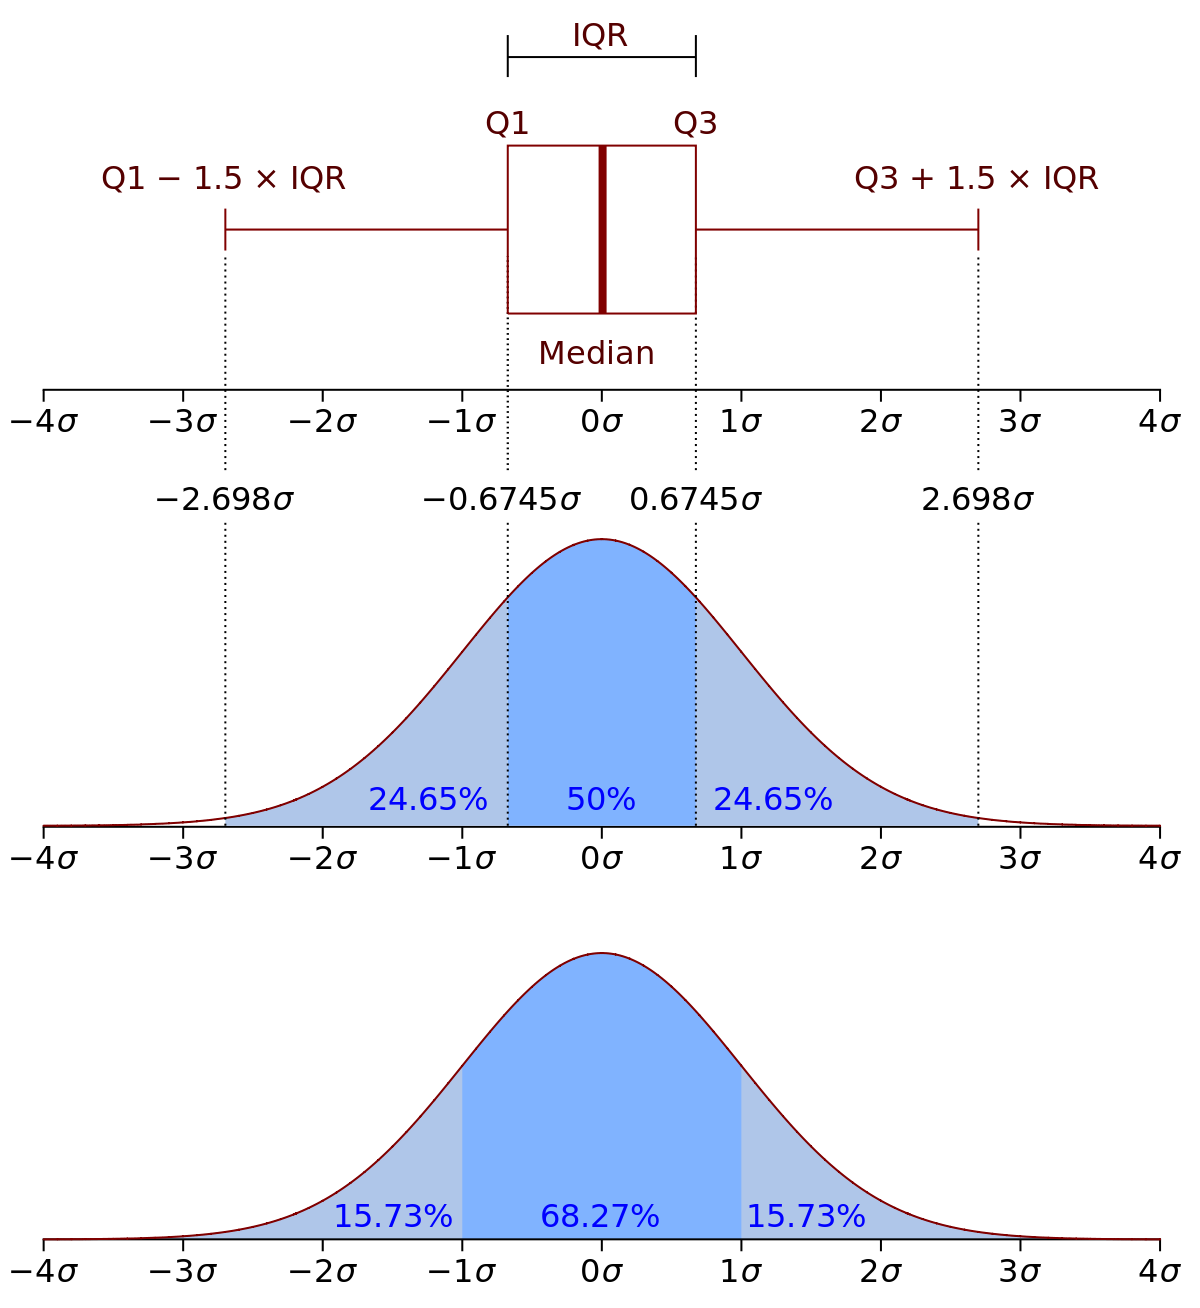

### Outlier Removal using Interquartile Range

In [ ]:
# Visualise column to find outliers
df_housing.boxplot(column=['total_bedrooms'])

In [ ]:
# Determine Interquartile range manually, alternative is using functions from the scipy library
Q1 = df_housing['total_bedrooms'].quantile(0.25)
Q3 = df_housing['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

#Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df_housing.query('(@Q1 - 1.5 * @IQR) <= total_bedrooms <= (@Q3 + 1.5 * @IQR)')
filtered.boxplot(column='total_bedrooms')

In [ ]:
# Double check the values
print(Q3 + 1.5 * IQR)
filtered.describe()

### Outlier Removal using Standard Deviations

In [ ]:
#Dropping the outlier rows with x number of standard deviations away from mean
factor = 2
upper_lim = df_housing['total_bedrooms'].mean() + df_housing['total_bedrooms'].std() * factor
lower_lim = df_housing['total_bedrooms'].mean() - df_housing['total_bedrooms'].std() * factor

df_housing = df_housing[(df_housing['total_bedrooms'] < upper_lim) & (df_housing['total_bedrooms'] > lower_lim)]

### Outlier Removal using Percentiles

In [ ]:
# Depending on distribution of data, assume a certain percent of the value from top/bottom as an outlier
#Dropping the outlier rows with Percentiles
upper_lim = df_housing['total_bedrooms'].quantile(.95)
lower_lim = df_housing['total_bedrooms'].quantile(.05)

df_housing = df_housing[(df_housing['total_bedrooms'] < upper_lim) & (df_housing['total_bedrooms'] > lower_lim)]

## Encoding Your Features
While looking at categorical features, we split them into two major types:

1. Nominal - No particular order ( starfish, dog, cat) or (toyota, proton, perodua)
2. Ordinal - Sequenced and ordered (hot, warm, cold) or (high, medium, low) or (excellent, okay, bad)

In [ ]:
# Here we illustrate with a new dataframe
df_temp_color.head()

### One Hot Encoding

In [ ]:
# Encoding using get_dummies()
encoded_columns = pd.get_dummies(df_temp_color['Temperature'])
df_temp_color_en = df_temp_color.join(encoded_columns).drop('Temperature', axis=1)

In [ ]:
encoded_columns

In [ ]:
df_temp_color_en

### Label Encoding
Note: Use `LabelEncoder` for **target** feature only

In [ ]:
# Initialise labelencoder class
labelencoder = LabelEncoder()

# Perform Label Encoding
df_temp_color['color_2'] = labelencoder.fit_transform(df_temp_color['Color'])
df_temp_color

### Ordinal Encoding

In [ ]:
# # Store ordinal features in order that you define
temp_dict = { 'Cold' : 1, 'Warm' : 2, 'Hot' : 3, 'Very Hot' : 4 }

df_temp_color['Temp_Ordinal'] = df_temp_color.Temperature.map(temp_dict)
df_temp_color

# Mathematical Transforms

Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your day to day practice. There are two most common ways to work with numerical data through transformations, apart from the imputation techniques that we learnt earlier.
- Applying arithmetic transforms to create ratios, percentages or other derivations
- Scaling

In [ ]:
df_housing.head(5)

## Applying Arithmetic Transforms

In [ ]:
# Create a new, more useful computed feature from raw features, in this case, a ratio
df_housing['bedroom_to_rooms_ratio'] = df_housing['total_bedrooms']/df_housing['total_rooms']
df_housing

## Scaling

Usually used on numerical features. for algorithms based on k-means or k-nn, scaling will cause the algorithm to work way better.

### Normalisation 

In [ ]:
# Normalisation brings all values between 0-1
scaler = MinMaxScaler()
df_housing['households_normalised'] = scaler.fit_transform(df_housing[['households']])
df_housing

### Standardisation

In [ ]:
# Standardization transforms values into z-scores
scaler = StandardScaler()
df_housing['households_standardized'] = scaler.fit_transform(df_housing[['households']])
df_housing

# Working With DateTimes

Very helpful transformations using the `datetime` library, pandas is also very optimised to do time series calculations:

1. Extracting the year, months, day 
2. Extracting time period between current date in terms of years, months, days
3. Extracting some specific feature such as Name of the weekday, Weekend or not, holiday or not, etc.

In [15]:
from datetime import date

data = pd.DataFrame({'date': ['01-01-2017', '04-12-2008', '23-06-1988', '25-08-1999', '20-02-1993']})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()        


In [16]:
data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,5,60,Sunday
1,2008-12-04,2008,12,14,157,Thursday
2,1988-06-23,1988,6,34,403,Thursday
3,1999-08-25,1999,8,23,269,Wednesday
4,1993-02-20,1993,2,29,347,Saturday


# Building Up and Breaking Down Features

## Binning
Binning refers to placing data into bins, summarizing them into smaller permutations. It works for both numerical and categorical data. The goal of binning is to enable your model to be more robust and less prone to overfitting.

### Binning Numerical Data

In [17]:
# Numerical Binning using pd.cut
data['bin'] = pd.cut(data['passed_months'], bins=[0, 200, 400, 600], labels=["Recent", "Not Long Ago", "Long Time Ago"])
data

,date,year,month,passed_years,passed_months,day_name,bin
0,2017-01-01,2017,1,5,60,Sunday,Recent
1,2008-12-04,2008,12,14,157,Thursday,Recent
2,1988-06-23,1988,6,34,403,Thursday,Long Time Ago
3,1999-08-25,1999,8,23,269,Wednesday,Not Long Ago
4,1993-02-20,1993,2,29,347,Saturday,Not Long Ago


### Binning Categorical Data

In [18]:
conditions = [
    data['day_name'].str.contains('Sunday'),
    data['day_name'].str.contains('Saturday')]

choices = ['Weekend', 'Weekend']

data['day_cat'] = np.select(conditions, choices, default='Weekday')

In [19]:
data

,date,year,month,passed_years,passed_months,day_name,bin,day_cat
0,2017-01-01,2017,1,5,60,Sunday,Recent,Weekend
1,2008-12-04,2008,12,14,157,Thursday,Recent,Weekday
2,1988-06-23,1988,6,34,403,Thursday,Long Time Ago,Weekday
3,1999-08-25,1999,8,23,269,Wednesday,Not Long Ago,Weekday
4,1993-02-20,1993,2,29,347,Saturday,Not Long Ago,Weekend


## Feature Splitting

In [ ]:
movies = pd.DataFrame({'Title': ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)']})
movies.head()

In [ ]:
# Splitting the Title Name
movies['title'] = movies.Title.str.split("(", n=1, expand=True)[0]
movies['release_date'] =  movies.Title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]
movies.drop(labels=['Title'], axis=1, inplace=True)

In [ ]:
movies

# Group Transforms

## Grouping Operations
Perhaps, one of the more useful tranforms, are grouping transformations. For example, in projects where you will need to create a list of all features from a user from a transactional raw table.

In [11]:
df_store

,userid,itemid,qty,amount
0,001,sk001,1,30
1,001,sk001,2,60
2,001,sk002,1,20
3,002,sk001,4,120
4,002,sk004,6,60
5,003,sk006,2,2
6,004,sk001,9,270
7,005,sk006,10,10
8,005,sk009,2,3
9,005,sk001,3,90


### Understanding how groupby works
To understand groupby, we need to first create a `groupby` object

In [12]:
grouped = df_store.groupby('userid')

By creating a groupby object, we are essentiall creating a big capsule that groups our data based on the criteria that we set, an example from another project shows illustrates below:
<div>
<img src="https://pbpython.com/images/groupby-example.png" width="500"/>
</div>


We can then do aggregations, like min, max, mean, count, and so on:

In [13]:
# Finding out the total quantities bought, and total amount spent
grouped.agg('max')

# Try replacing the code above to reflect means, counts, maximum and minimums

,itemid,qty,amount
userid,,,
001,sk002,2,60
002,sk004,6,120
003,sk006,2,2
004,sk001,9,270
005,sk009,10,90


In [14]:
# Advanced, you can even create a function to to perform multiple aggregations to different columns and them all out again
def f(x):
    d = {}
    d['qty_sum'] = x['qty'].agg('sum')
    d['qty_max'] = x['qty'].agg('max')
    d['amount_avg'] = x['amount'].agg('mean')
    d['unique_item_purhcased'] = x['itemid'].agg(pd.Series.nunique)
    return pd.Series(d, index=['qty_sum', 'qty_max', 'amount_avg', 'unique_item_purhcased'])

df_store.groupby('userid').apply(f)

,qty_sum,qty_max,amount_avg,unique_item_purhcased
userid,,,,
001,4.0,2.0,36.666667,2.0
002,10.0,6.0,90.000000,2.0
003,2.0,2.0,2.000000,1.0
004,9.0,9.0,270.000000,1.0
005,15.0,10.0,34.333333,3.0
